# Technical exercise - Data scientist intern @ Giskard

Hi! As part of our recruitment process, we’d like you to complete the following technical test in 10 days. Once you finish the exercise, you can send your notebook or share your code repository by email (matteo@giskard.ai). If you want to share a private GitHub repository, make sure you give read access to `mattbit`.

If you have problems running the notebook, get in touch with Matteo at matteo@giskard.ai.

In [1]:
# %pip install numpy pandas scikit-learn datasets transformers torch "giskard>=2.0.0b"

## Exercise 1: Code review

Your fellow intern is working on securing our API and wrote some code to generate secure tokens. You have been asked to review their code and make sure it is secure and robust. Can you spot the problem and write a short feedback?

In [2]:
import random

ALPHABET = "abcdefghijklmnopqrstuvxyz0123456789"


def generate_secret_key(size: int = 20):
    """Generates a cryptographically secure random token."""
    token = "".join(random.choice(ALPHABET) for _ in range(size))
    return token


The `random` module in Python is not cryptographically secure for generating secure tokens or keys. For such purposes, it's recommended to use the `secrets` module which provides functions for generating secure tokens.

Example of a function to correct mistakes

In [3]:
import secrets
import string

ALPHABET = string.ascii_lowercase + string.digits


def modified_generate_secret_key(size: int = 20):
    """Generates a cryptographically secure random token."""
    if size < 15:
        # 15 is the minimum length for a secure token
        raise ValueError("size must be at least 15")
    else:
        token = ''.join(secrets.choice(ALPHABET) for _ in range(size))
        return token

- This code uses `secrets.choice()` to generate a secure token by leveraging the `secrets` module, which is designed for generating cryptographically secure random numbers suitable for managing data such as passwords, account authentication, and tokens. 

- Additionally, `string.ascii_lowercase` and `string.digits` are used to form the ALPHABET string, ensuring it includes all lowercase letters and digits for a comprehensive token generation instead of a manually written string like in the previous code. Moreover it avoids typos.

- Moreover we added a minimum size of 15: the longer the token, the higher the randomness and unpredictability. Longer tokens have more possible combinations, making them harder to guess or brute-force by attackers.

In [4]:
print(modified_generate_secret_key())

cvjbpgdx92ravziexok8


In [5]:
print(modified_generate_secret_key(10))

ValueError: size must be at least 15

## Exercise 2: High dimensions

Matteo, our ML researcher, is struggling with a dataset of 40-dimensional points. He’s sure there are some clusters in there, but he does not know how many. Can you help him find the correct number of clusters in this dataset?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


x = np.load("points_1.npy")

print(x.shape)

(4752, 40)


Apply KMeans to the dataset

In [24]:
wccs = [] # within cluster sum of squares

for i in range(1, 40):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wccs.append(kmeans.inertia_)

c:\Users\mdale\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mdale\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mdale\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mdale\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Calculate first derivative of the WCSS

In [25]:
d_wccs = np.diff(wccs)
d_ratio = d_wccs[1:] / d_wccs[:-1]

Finding the "elbow" in the curve

In [26]:
optimal_num_clusters_KMeans = np.argmin(d_ratio) + 2 # Adding 2 due to zero-based indexing and slicing

Plotting the results

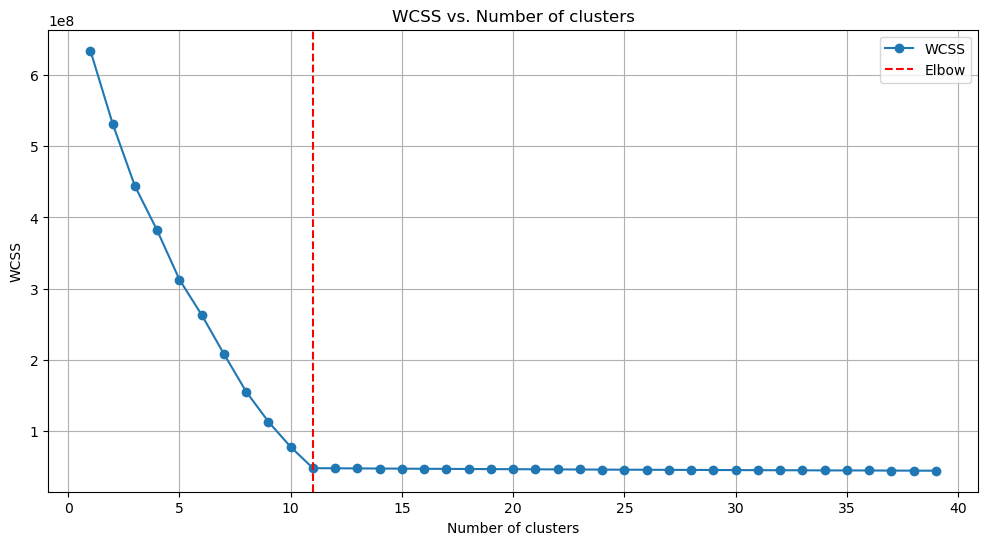

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(range(1, 40), wccs, marker='o', label='WCSS')
ax.axvline(optimal_num_clusters_KMeans, color='red', linestyle='--', label='Elbow')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
ax.set_title('WCSS vs. Number of clusters')
ax.legend()
plt.grid(True)
plt.show()

Looking at the plot we can see there is clear elbow at 11 clusters 

In [29]:

print(f'It looks like there are {optimal_num_clusters_KMeans} clusters.')


It looks like there are 11 clusters.


We can see the same thing by measuring the silhouette score for different number of clusters

The silhouette score is a metric used to evaluate the quality of clustering. It measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. It ranges in $[-1,1]$.

In [31]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []
for n_clusters in range(2, 40):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(x)
    score = silhouette_score(x, labels)
    silhouette_scores.append(score)

optimal_num_clusters_agg_cl = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 due to zero-based indexing

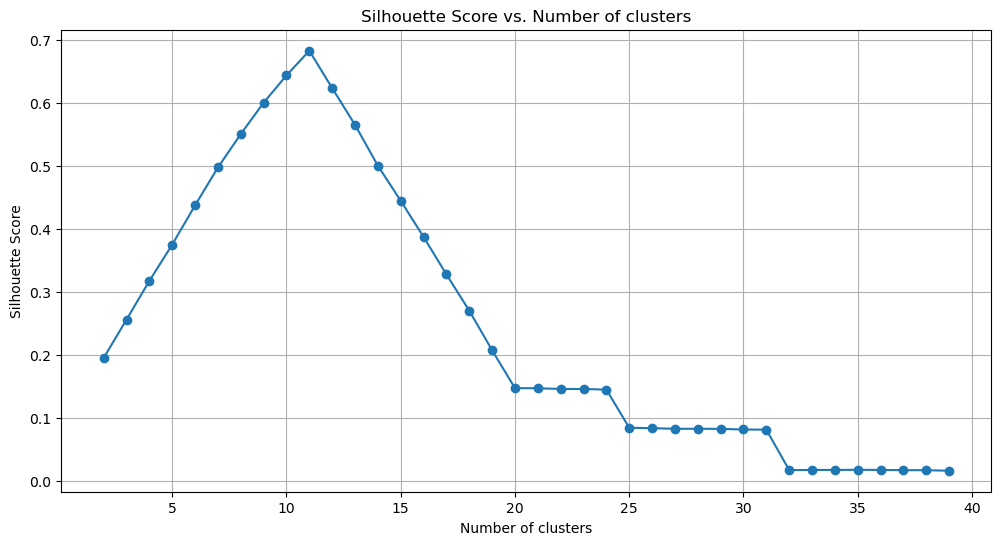

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 40), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of clusters')
plt.grid(True)
plt.show()

We can see that the highest silhouette is for 11 clusters

In [32]:
print(f'It looks like there are {optimal_num_clusters_agg_cl} clusters.')

It looks like there are 11 clusters.


We can try to see the division in clusters through a dendogram

A dendrogram is a tree-like diagram used to visualize the arrangement of data points as they are grouped into clusters based on their similarity or distance. It is a hierarchical representation of the clustering process, showing how data points are merged or divided at different levels of granularity.

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [35]:
linked = linkage(x, method='ward', metric='euclidean')

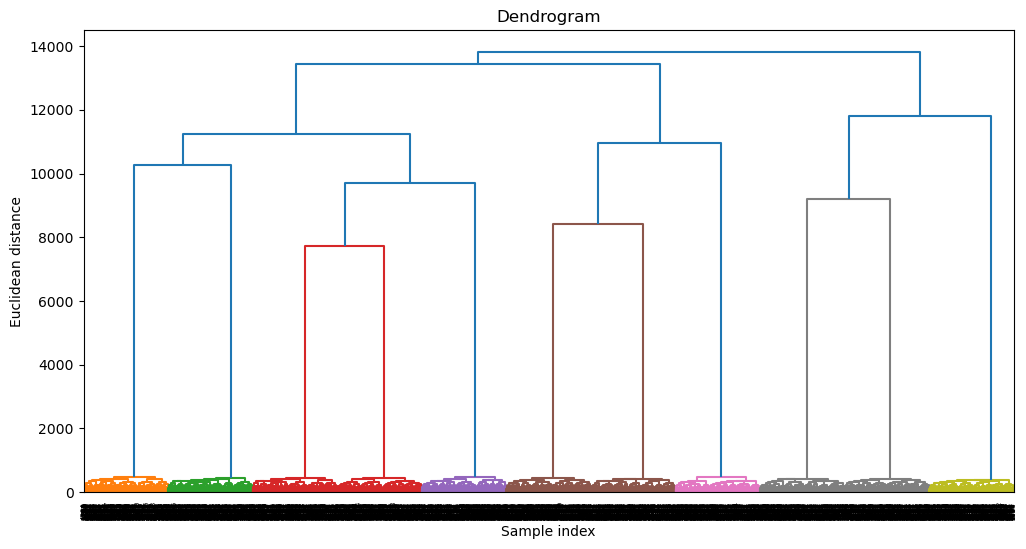

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.title('Dendrogram')
plt.grid(False)
plt.show()

We can clearly see there are 11 clusters

Matteo is grateful for how you helped him with the cluster finding, and he has another problem for you. He has another high-dimensional dataset, but he thinks that those points could be represented in a lower dimensional space. Can you help him determine how many dimensions would be enough to well represent the data?

In [36]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

x = np.load("points_2.npy")

print(x.shape)

(1000, 40)


Apply PCA for dimensionality reduction

In [37]:
pca = PCA()
pca.fit(x)

PCA()

Explained variance ratio for each component

In [38]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

Plotting the explained variance ratio

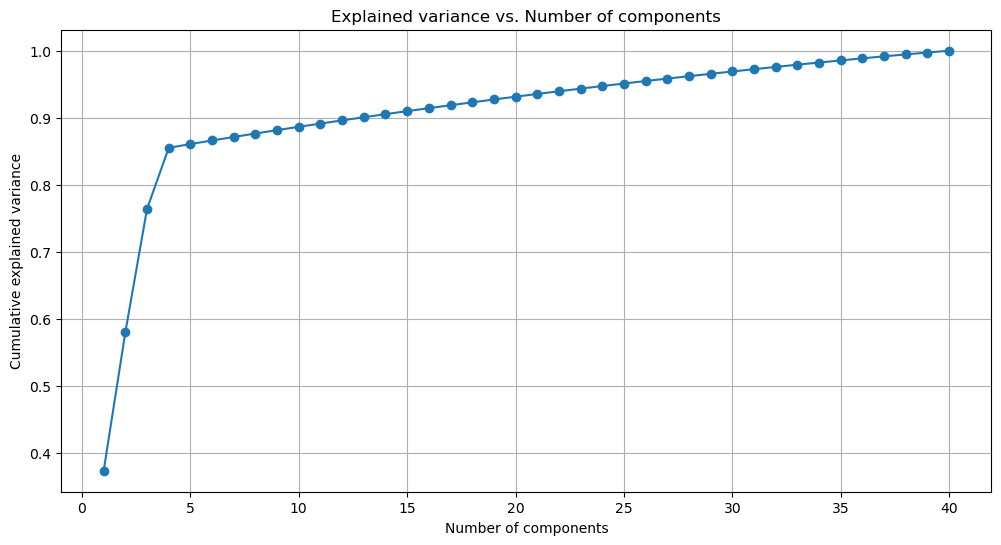

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
ax.set_xlabel('Number of components')
ax.set_ylabel('Cumulative explained variance')
ax.set_title('Explained variance vs. Number of components')
plt.grid(True)
plt.show()

## REMOVE THIS PART MAYBE

Finding the number of dimensions to explain at least 95% variance

In [40]:
num_dims_95_var = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of dimensions to explain at least 95% variance: {num_dims_95_var}")

Number of dimensions to explain at least 95% variance: 25


Looking at the plot, it seems like most of the variance (betweeen 80% and 90% is explained by 4 dimensions), let's confirm this using the elbow technique

In [41]:
d_cum_var = np.diff(cumulative_variance)
d_ratio_cum_var = d_cum_var[1:] / d_cum_var[:-1]

optimal_dimension = np.argmin(d_ratio_cum_var) + 2 # Adding 2 due to zero-based indexing and slicing

print(f'Optimal dimension: {optimal_dimension}')
print(f'Variance explained by {optimal_dimension} dimensions: {cumulative_variance[optimal_dimension - 1]}')

Optimal dimension: 4
Variance explained by 4 dimensions: 0.8550294546758482


In [42]:
print(f"It looks the data is {optimal_dimension}-dimensional")

It looks the data is 4-dimensional


## Exercise 3: Mad GPT

Matteo is a good guy but he is a bit messy: he fine-tuned a GPT-2 model, but it seems that something went wrong during the process and the model became obsessed with early Romantic literature.

Could you check how the model would continue a sentence starting with “Ty”? Could you recover the logit of the next best token? And its probability?

You can get the model from the HuggingFace Hub as `mattbit/gpt2wb`.


In [43]:
!pip install transformers==4.20

  Using cached transformers-4.20.0-py3-none-any.whl (4.4 MB)
  Using cached tokenizers-0.12.1.tar.gz (220 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build tokenizers


  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [51 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\tokenizers
      copying py_src\tokenizers\__init__.py -> build\lib.win-amd64-cpython-311\tokenizers
      creating build\lib.win-amd64-cpython-311\tokenizers\models
      copying py_src\tokenizers\models\__init__.py -> build\lib.win-amd64-cpython-311\tokenizers\models
      creating build\lib.win-amd64-cpython-311\tokenizers\decoders
      copying py_src\tokenizers\decoders\__init__.py -> build\lib.win-amd64-cpython-311\tokenizers\decoders
      creating build\lib.win-amd64-cpython-311\tokenizers\normalizers
      copying py_src\tokenizers\normalizers\__init__.py -> build\lib.win-amd64-cpython-311\tokenizers\normalizers
      creating build\lib.

In [44]:
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("mattbit/gpt2wb")

# ...


ImportError: cannot import name 'AutoModelForCausalLM' from 'transformers' (c:\Users\mdale\anaconda3\Lib\site-packages\transformers\__init__.py)

## Exercise 4: Not bad reviews


We trained a random forest model to predict if a film review is positive or negative. Here is the training code:

In [1]:
import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline


# Load training data
train_data = datasets.load_dataset("sst2", split="train[:20000]").to_pandas()
valid_data = datasets.load_dataset("sst2", split="validation").to_pandas()

# Prepare model
with open("stopwords.txt", "r") as f:
    stopwords = [w.strip() for w in f.readlines()]

preprocessor = TfidfVectorizer(stop_words=stopwords, max_features=5000, lowercase=False)
classifier = RandomForestClassifier(n_estimators=400, n_jobs=-1)

model = Pipeline([("preprocessor", preprocessor), ("classifier", classifier)])

# Train
X = train_data.sentence
y = train_data.label

model.fit(X, y)

print(
    "Training complete.",
    "Accuracy:",
    model.score(valid_data.sentence, valid_data.label),
)


Training complete. Accuracy: 0.75


Overall, it works quite well, but we noticed it has some problems with reviews containing negations, for example:

In [2]:
# Class labels are:
# 1 = Positive, 0 = Negative

# this returns positive, that’s right!
assert model.predict(["This movie is good"]) == [1]

# negative! bingo!
assert model.predict(["This movie is bad"]) == [0]

# WHOOPS! this ↓ is predicted as negative?! uhm…
assert model.predict(["This movie is not bad at all!"]) == [1]

# WHOOPS! this ↓ is predicted as negative?! why?
assert model.predict(["This movie is not perfect, but very good!"]) == [1]


AssertionError: 

Can you help us understand what is going on? Do you have any idea on how to fix it?
You can edit the code above.

## Exercise 5: Model weaknesses


The Giskard python library provides an automatic scanner to find weaknesses and vulnerabilities in ML models.

Using this tool, could you identify some issues in the movie classification model above? Can you propose hypotheses about what is causing these issues?

Then, choose one of the issues you just found and try to improve the model to mitigate or resolve it — just one, no need to spend the whole weekend over it!

You can find a quickstart here: https://docs.giskard.ai/en/latest/getting-started/quickstart.html